Eleonora Pura, 17-732-678

In [6]:
import networkx as nx
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import math
import warnings
warnings.filterwarnings('ignore')

<h1>A07.1 - The Marčenko-Pastur law</h1>

Task: For the 97 most capitalized stocks in the NY Stock Exchange, filter the correlation matrix of returns at the 1 hour and 1 minute timescales using Marčenko-Pastur law

For each of the provided correlation matrices (for 1 hour and 1
minute returns):
+ compute the eigenvalues and eigenvectors
+ plot the histogram of eigenvalues and superimpose the Marčenko-Pastur law with parameter
    
    - for hourly returns, 𝑄 = 3.6289
    - for minute returns, 𝑄 = 200.8969
    
+ compute the denoised correlations (see lecture)


In [17]:
def find_eigval(cormat):
    return np.linalg.eig(cormat)
    

def compute_marcenko(dataset, Q, eigval):
    lam = (1 + (1 / Q))
    lambda_max = (1 + (1 / Q)) + 2 * np.sqrt(1 / Q)
    lambda_min = (1 + (1 / Q)) - 2 * np.sqrt(1 / Q)

    return Q / (2 * np.pi) * np.sqrt((lambda_max - eigval) * (eigval - lambda_min)) / eigval
    
    
def plot_histogram(eigval, marcenko, dataset):
    n, bins, patches = plt.hist(eigval, label='Eigen values', bins="auto", density=True)
    plt.plot(marcenko, label='Marčenko')
    plt.title('Eigen values and Marčenko distributions for {}'.format(dataset))
    plt.legend()
    plt.grid()
    plt.show()
    
    
def normalize_array(eigval, Q):
    lambda_max = (1 + (1 / Q)) + 2 * np.sqrt(1 / Q)
    eigval = np.where(eigval < lambda_max, 1, eigval)
    norm = np.linalg.norm(eigval)
    normal_eigval = eigval/norm
    
    return normal_eigval

def return_denoised_correlation(eigvec, eigval, Q):
    return np.dot(eigvec, np.diag((normalize_array(eigval, Q))), np.linalg.inv(eigvec))
    
    
def show_solution(dataset, Q):
    cormat = np.load(dataset)
    eigval, eigvec = find_eigval(cormat)
    marcenko = compute_marcenko(dataset, Q, eigval)
    plot_histogram(eigval, marcenko, dataset)
    
    print("Denoised correlation matrix for {}".format(dataset))
    denoised_corr = return_denoised_correlation(eigvec, eigval, Q)
    
    print(denoised_corr)

    



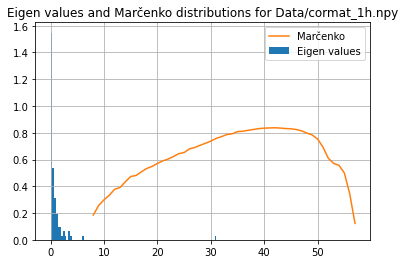

Denoised correlation matrix for Data/cormat_1h.npy
[[ 0.05892205  0.00935328 -0.02020725 ...  0.00074521 -0.00124675
  -0.00073139]
 [ 0.08670804  0.00244483  0.00046987 ... -0.0009501  -0.00107191
  -0.00033894]
 [ 0.09898211  0.0103031   0.00910925 ... -0.0004178   0.00208974
  -0.00157406]
 ...
 [ 0.08694375 -0.01780076  0.01230074 ...  0.0057639   0.00219943
  -0.0001697 ]
 [ 0.07108352 -0.01671667  0.03265826 ...  0.00025885  0.0008825
   0.00413621]
 [ 0.10428179 -0.04424409 -0.00397105 ...  0.00713363 -0.00211341
  -0.00216836]]


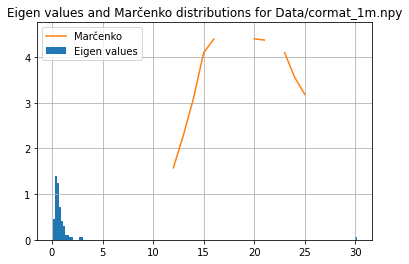

Denoised correlation matrix for Data/cormat_1m.npy
[[ 0.07923994  0.00307581  0.00482249 ... -0.00343095 -0.00013488
   0.00032771]
 [ 0.06983397  0.00437058 -0.00358772 ...  0.00057539 -0.00583645
  -0.00149735]
 [ 0.09320358  0.01139772  0.00375775 ... -0.00115016  0.00303113
  -0.00480678]
 ...
 [ 0.08272279 -0.00343083 -0.01306549 ...  0.00698175  0.00348661
  -0.00397351]
 [ 0.09333731  0.00210518 -0.01724588 ...  0.00315751  0.00372142
   0.00551341]
 [ 0.11705568 -0.02066147  0.00148381 ... -0.00370589 -0.00157889
  -0.00037628]]


In [18]:
dataset_1h = 'Data/cormat_1h.npy'
dataset_1m = 'Data/cormat_1m.npy'

show_solution(dataset_1h, 3.6289)
show_solution(dataset_1m, 200.8969)


<h1>A07.2 - Correlation MSTs</h1>

Task: Build MSTs from denoised correlations and analyze them

+ make a scatterplot of the 1 hour vs 1 minute denoised correlations (1 data point per pair of stocks)

In [25]:
def scatter_plot(x, y, title, xaxis, yaxis):
    plt.title(title)
    plt.scatter(x, y, c="g")
    plt.xlabel(xaxis)
    plt.ylabel(yaxis)
    plt.show()

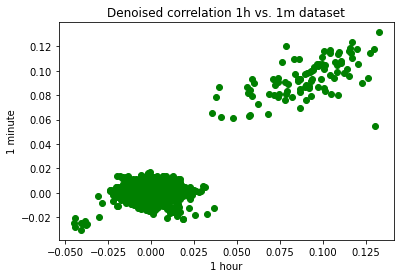

In [26]:
cormat_1h = np.load(dataset_1h)
eigval_1h, eigvec_1h = find_eigval(cormat_1h)

denoised_corr_1h = return_denoised_correlation(eigvec_1h, eigval_1h, 3.6289)


cormat_1m = np.load(dataset_1m)
eigval_1m, eigvec_1m = find_eigval(cormat_1m)

denoised_corr_1m = return_denoised_correlation(eigvec_1m, eigval_1m, 200.8969)


scatter_plot(denoised_corr_1h, denoised_corr_1m, "Denoised correlation 1h vs. 1m dataset", "1 hour", "1 minute")

+ from the denoised correlation matrices, build the Minimum Spanning Tree (see lecture)
+ assign the correct ticker (’AAPL’, ’AMZN’, …) as an attribute to the nodes and calculate the degrees
+ make a scatterplot of the 1 hour vs 1 minute MST degrees of stocks (1 data point per stock)

<h1>A07.3 - Conclusions</h1>

Task: finish the analysis by drawing conclusions<

Answer the following questions (for both timescales):
1. Is there a ‘market mode’?
2. Which is the stock that has the strongest relation with the market?
3. Which are the 5 stocks with highest degree on the MST?
4. Is the degree distribution of MSTs qualitatively the same at 1 minute and 1 hour?
